## find fixed point

In [37]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from parfor import parfor
from tqdm.notebook import tqdm

In [38]:
eta1,eta2,r,phi,alpha,beta = sp.symbols('eta1 eta2 r phi alpha beta',real=True)
beta_rp = eta2*r/(eta1*sp.cos(alpha+2*phi))*(-sp.cos(alpha+phi)+sp.sqrt(sp.cos(alpha+phi)**2-sp.cos(alpha)*sp.cos(alpha+2*phi)))
beta_rm = eta2*r/(eta1*sp.cos(alpha+2*phi))*(-sp.cos(alpha+phi)-sp.sqrt(sp.cos(alpha+phi)**2-sp.cos(alpha)*sp.cos(alpha+2*phi)))

dr = sp.Rational(1,2) * r* (1-r**2)*(eta2**2 * r**2 * sp.cos(alpha) + 2 * beta*eta1*eta2*r*sp.cos(alpha+phi) + beta **2 *eta1**2 * sp.cos(alpha + 2*phi))
dpsi2 = - sp.Rational(1,2) * (1+r**2)*(eta2**2 * r**2 * sp.sin(alpha) + 2 * beta*eta1*eta2*r*sp.sin(alpha+phi) + beta**2 * eta1**2 * sp.sin(alpha+2*phi))
dpsi1 = - sp.Rational(1,2) * (2)*(eta1**2 *sp.sin(alpha) + 2 * beta*eta1*eta2*r *sp.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * sp.sin(alpha-2*phi))
dphi = dpsi2 - dpsi1
sol_rs =  sp.solve(dr,r)

In [41]:
dr = (eta2**2 * r**2 * sp.cos(alpha) + 2 * beta*eta1*eta2*r*sp.cos(alpha+phi) + beta**2 * eta1**2 * sp.cos(alpha + 2*phi))

In [55]:
dphi1 = dphi.subs(r,1)

In [61]:
sp.solve(dphi.subs(eta2,0),r)[1].subs(phi,-alpha/2+sp.pi/4)

sqrt(-beta**2 + 2*sin(alpha))/beta

In [53]:
sp.solve(sp.cos(alpha + 2*phi),phi)

[-alpha/2 + pi/4, -alpha/2 + 3*pi/4]

In [46]:
sp.solve(dr,r)[0]

beta*eta1*(-cos(alpha + phi) + Abs(sin(phi)))/(eta2*cos(alpha))

In [44]:
dphi.subs(r,sp.solve(dr,r)[0])

beta**4*eta1**2*(-cos(alpha + phi) + Abs(sin(phi)))**2*sin(alpha - 2*phi)/cos(alpha)**2 + 2*beta**2*eta1**2*(-cos(alpha + phi) + Abs(sin(phi)))*sin(alpha - phi)/cos(alpha) + eta1**2*sin(alpha) + (-beta**2*eta1**2*(-cos(alpha + phi) + Abs(sin(phi)))**2/(2*eta2**2*cos(alpha)**2) - 1/2)*(beta**2*eta1**2*(-cos(alpha + phi) + Abs(sin(phi)))**2*sin(alpha)/cos(alpha)**2 + 2*beta**2*eta1**2*(-cos(alpha + phi) + Abs(sin(phi)))*sin(alpha + phi)/cos(alpha) + beta**2*eta1**2*sin(alpha + 2*phi))

In [42]:
sp.solve(dr,r)

[beta*eta1*(-cos(alpha + phi) + Abs(sin(phi)))/(eta2*cos(alpha)),
 -beta*eta1*(cos(alpha + phi) + Abs(sin(phi)))/(eta2*cos(alpha))]

In [35]:
sol_rs[-2]

beta*eta1*(-cos(alpha + phi) + Abs(sin(phi)))/(eta2*cos(alpha))

In [27]:
def phi0(phi,alpha,beta,eta1,eta2,r):
    # eta1 delta peak의 분포 차
    r1 = 1
    r2 = r
    dpsi1 = -1/2 * (1+r1**2)*(eta1**2 * r1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r1*r2*np.sin(alpha+phi) + beta**2 * eta2**2 * r2**2 * np.sin(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r2**2)*(eta2**2 * r2**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r2*r1*np.sin(alpha-phi) + beta**2 * eta1**2 * r1**2 * np.sin(alpha - 2*phi))
    dphi = dpsi1 - dpsi2
    return dphi


def dr(phi,alpha,beta,eta1,eta2,r):
    dr = 1/2 * r* (1-r**2)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta **2 *eta1**2 * np.cos(alpha + 2*phi))
    return dr

def phi1(phi,alpha,beta,eta1,eta2,r):
    # eta1 delta peak의 분포 차
    r0 = r(phi,alpha,beta,eta1,eta2)
    dpsi2 = - 1/2 * (1+r0**2)*(eta2**2*r0*np.sin(alpha)+2*beta*eta1*eta2*r0*np.sin(alpha+phi)+beta**2*eta1**2*np.sin(alpha+2*phi))
    dpsi1 = - 1/2 * (2)*(eta1**2*np.sin(alpha)+2*beta*eta1*eta2*r0*np.sin(alpha-phi)+beta**2*eta2**2*r0**2*np.sin(alpha-2*phi))
    dphi = dpsi2 - dpsi1
    return dphi    

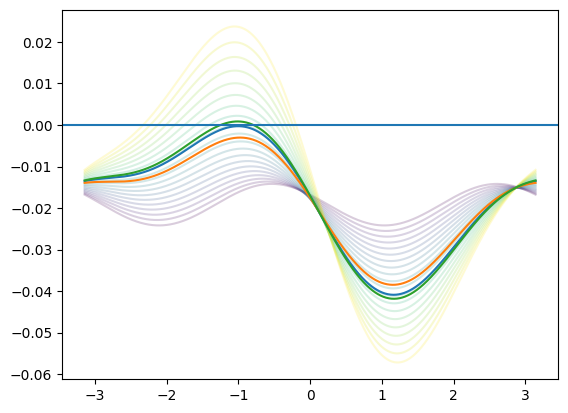

In [26]:
phi = np.linspace(-np.pi,np.pi, 1000)
alpha = 0.5
beta = 0.5
eta1 = 0.2
eta2 = 0.1

rs = np.linspace(0,1,20)
color = plt.cm.viridis
for r in rs:
    plt.plot(phi,phi0(phi,alpha,beta,eta1,eta2,r),color=color(r),alpha=0.2)



plt.plot(phi,phi0(phi,alpha,beta,eta1,eta2,0.572044069770615 ))
plt.plot(phi,phi0(phi,alpha,beta,eta1,eta2,0.5 ))
plt.plot(phi,phi0(phi,alpha,beta,eta1,eta2,0.6 ))
plt.axhline(0)

# plt.plot(phi,phi1(phi,alpha,beta,eta1,eta2,r),color=color(r))

# plt.plot(phi,phi0(phi,alpha,beta,eta1,eta2,0.6))
# plt.plot(phi,phi0(phi,alpha,beta,eta1,eta2,0.6))

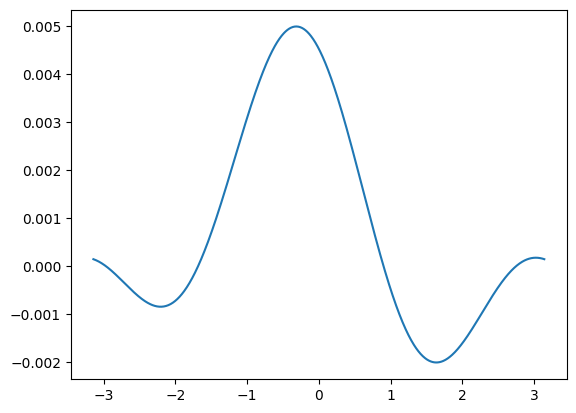

In [32]:
plt.plot(phi,dr(phi,alpha,beta,eta1,eta2,0.7))

## Find limit cycle

In [45]:
from functools import partial

import numpy as np
import jax
import jax.numpy as jnp
from jax.flatten_util import ravel_pytree

import matplotlib.pyplot as plt

from scipy.optimize import minimize
from cyipopt import minimize_ipopt  # NOTE: requires IPOPT to be installed

import collimator
from collimator.simulation import SimulatorOptions
from collimator.models import VanDerPol, RimlessWheel, CompassGait

ModuleNotFoundError: No module named 'jax'